In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn import metrics 
import seaborn as sns
import os
size_img=28
threshold_color=110/255

In [2]:
df_test=pd.read_csv('mnist_test.csv')
df_train=pd.read_csv('mnist_train.csv')

In [3]:
print(df_test.shape)

(10000, 785)


In [4]:
print(df_train.shape)

(60000, 785)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
df_train.shape

(60000, 785)

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [8]:
df_test.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_test.label.head(5)

0    7
1    2
2    1
3    0
4    4
Name: label, dtype: int64

In [10]:
df_train.label.unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=int64)

In [11]:
df_test.label.unique()

array([7, 2, 1, 0, 4, 9, 5, 6, 3, 8], dtype=int64)

In [12]:
df_train.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_train.label.head(5)

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [14]:
y_train=np.array(df_train.iloc[:,0])

In [15]:
x_train=np.array(df_train.iloc[:,1:])

In [16]:
x_test=np.array(df_test.iloc[:,1:])

In [17]:
y_test=np.array(df_test.iloc[:,0])

In [18]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [20]:
n_features_train=x_train.shape[1]
n_samples_train=x_train.shape[0]
n_features_test=x_test.shape[1]
n_samples_test=x_test.shape[0]
print([n_features_train],[n_samples_train],[n_features_test],[n_samples_test])
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

[784] [60000] [784] [10000]
(60000, 784) (60000,) (10000, 784) (10000,)


In [21]:
def img_show(x):
    plt.figure(figsize=(8,7))
    if x.shape[0]>100:
        print(x.shape[0])
        n_imgs=20
        n_samples=x.shape[0]
        x=x.reshape(n_samples,size_img,size_img)
        for i in range(20):
            plt.subplot(4,5,i+1)
            plt.imshow(x[i])
        plt.show()
        
    else:
        plt.imshow(x)
        plt.show()

60000


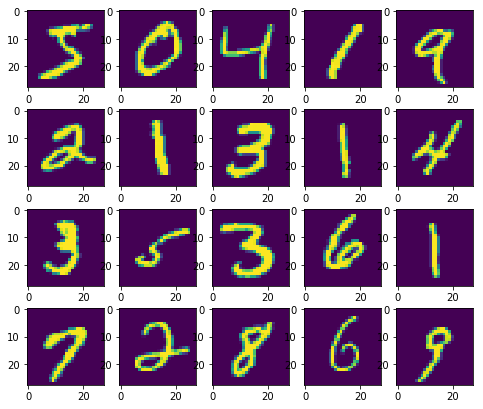

In [22]:
img_show(x_train)

In [23]:
# Calculate ROC Curve 


from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve

In [24]:
# Instatiating an object 

classifier=LogisticRegression(solver='lbfgs')
classifier.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_predict=classifier.predict(x_test)

In [26]:
# Predicting Probabilities on Test Set
# lr_prob=classifier.predict_proba(x_test)
# print(lr_prob)


In [27]:
#Keeping probabilities for Positive outcome only
# lr_prob=lr_prob[:,1]
# print(lr_prob)

In [28]:
# Using LabelBinarizer for multiclass output 

def m_roc_auc_score(y_test,y_predict,average='macro'):
    lb=LabelBinarizer()
    lb.fit(y_test)
    y_test=lb.transform(y_test)
    y_predict=lb.transform(y_predict)
    
    return roc_auc_score(y_test,y_predict,average=average)
    
    

In [29]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.90      0.91      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.85      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.83      0.88      0.86       974
           9       0.90      0.90      0.90      1009

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [30]:
lr_auc=m_roc_auc_score(y_test,y_predict,average='micro')
print("Logistic Regression: AUC ROC=%.3f" %(lr_auc))

Logistic Regression: AUC ROC=0.954


In [31]:
# multilabel_confusion_matrix(y_test,y_predict)
precision_recall_fscore_support(y_test,y_predict,average='macro')
precision_recall_fscore_support(y_test,y_predict,average='micro')
precision_recall_fscore_support(y_test,y_predict,average='weighted')


#Question : Why precision_recall_support score  has 'none' in case of weighted  average 


# Possible Explanation 'weighted':
# Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). 
# This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.


(0.9180219617123481, 0.9178, 0.9176714582753007, None)

In [32]:
# Calculating ROC_AUC_SCORE & ROC Curves 

lr_auc=m_roc_auc_score(y_test,y_predict,average='macro')
print("Logistic Regression: AUC ROC=%.3f" %(lr_auc))

Logistic Regression: AUC ROC=0.954


In [33]:
print(accuracy_score(y_test,y_predict))

0.9178


In [34]:
print(confusion_matrix(y_test,y_predict))

[[ 957    0    0    4    0    3    6    2    6    2]
 [   0 1116    3    1    0    1    4    1    8    1]
 [   8   12  905   18    9    5   10   11   51    3]
 [   3    0   19  915    2   22    5   11   25    8]
 [   1    2    4    3  910    0   12    2   10   38]
 [  11    2    1   34   10  762   16    7   40    9]
 [   7    3    7    2    4   17  909    1    8    0]
 [   3    6   24    4    7    1    1  945    5   32]
 [   9   14    7   22   11   27    7   12  854   11]
 [   9    6    2   13   30    4    0   24   16  905]]


In [35]:
#Geeting ROC_AUC_Curve for multilabel 

# Computing  macro-average ROC curve and ROC area

In [36]:
# Compute macro-average ROC curve and ROC area

In [37]:
#Aggregating all false positive rates

# y=label_binarize((y_test.iloc[:],),classes=)
# n_classes=784
# fpr=dict()
# tpr=dict()
# roc_auc=dict()

#Micro average ROC Curve & ROC Area 
    
# fpr["micro"],tpr["micro"],_=roc_curve(y_test.ravel(),y_predict.ravel())
# roc_auc["micro"]=auc(fpr["micro"],tpr["micro"])

# all_fpr=np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# #Interpolating all ROC curves at this point 

# mean_tpr=np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr+= interp(all_fpr,fpr[i],tpr[i])

    
# Averaging this by n_classes & computing AUC

# mean_tpr/=n_classes


# fpr["macro"]=all_fpr
# tpr["macro"]=mean_tpr
# roc_auc["macro"]=auc(fpr["macro"],tpr["macro"])



# #plotting all ROC Curves

# plt.figure()
# plt.plot(fpr["micro"],tpr["micro"],
#         label='micro-average ROC Curve(area={0:0.2f})'
#         ''.format(roc_auc["micro"]),
#         color='deeppink',linestyle=':',linewidth=4)

# plt.plot(fpr["macro"],tpr["macro"],
#         label='macro-average ROC Curve(area={0:0.2f})'
#         ''.format(roc_auc["macro"]),
#          color='navy',linestyle=':',linewidth=4)

# colors=cycle(['aqua','darkorange','cornflowerblue'])

# for i, color in zip(range(n_classes),colors):
#     plt.plot(fpr[i],tpr[i],color=color,lw=lw,
#             label='ROC Curve of class {0}(area={1:0.2f})'
#             ''.format(i,roc_auc[i]))
    
# plt.plot([0,1],[0,1],'k--',lw=lw)
# plt.xlim([0.0,1.0])
# plt.ylim([0.0,1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Multi class ROC')
# plt.legend(loc="lower right")
# plt.shiow()

